# Heart Disease Dataset

## General information

This dataset contains medical data used for predicting heart disease. The data includes various attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), and ST depression induced by exercise relative to rest (oldpeak).

### Columns

age: Age of the patient (in years)  
sex: Sex of the patient (1 = male, 0 = female)  
cp: Chest pain type (1-4)  
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)  
chol: Serum cholesterol in mg/dl  
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
restecg: Resting electrocardiographic results (0-2)  
thalach: Maximum heart rate achieved  
exang: Exercise-induced angina (1 = yes; 0 = no)  
oldpeak: ST depression induced by exercise relative to rest  
slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)  
ca: Number of major vessels colored by fluoroscopy (0-4)  
thal: Thalassemia (0 = null/unknown, 1 = fixed defect, 2 = normal, 3 = reversible defect)  
target: Diagnosis of heart disease (1 = yes, 0 = no)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **EDA**

### First impression

In [4]:
#read data
df = pd.read_csv('heart-disease.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data cleaning

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True)

### Univariate analysis

In [14]:
#seperate numerical and categorical columns
cats = [i for i in df.columns if df[i].nunique() <=5]
nums = [i for i in df.columns if i not in cats]

In [15]:
df[nums].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


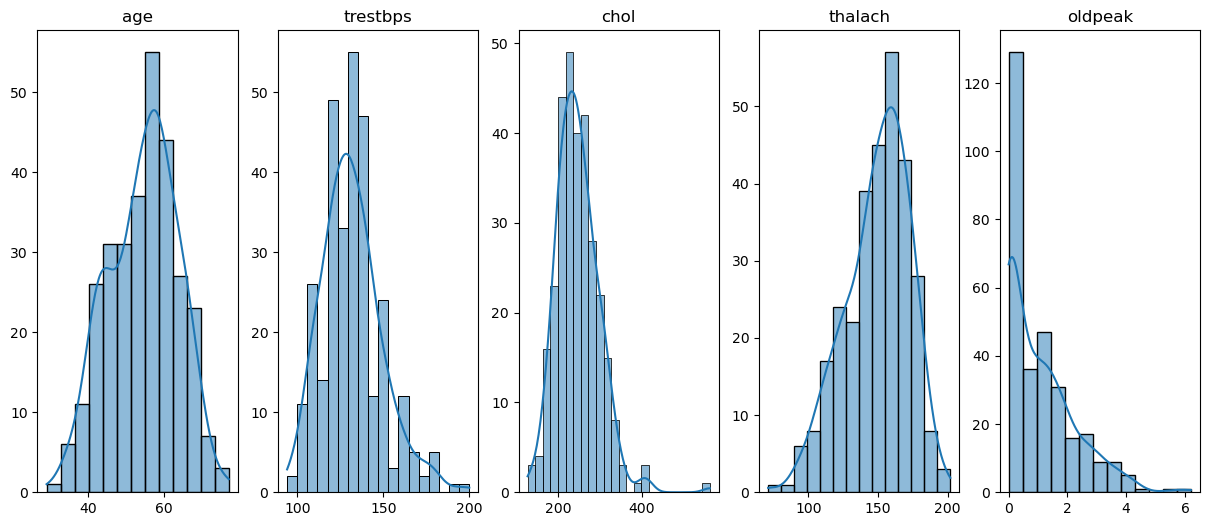

In [16]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for idx, col in enumerate(nums):
    sns.histplot(df, x = col, ax=axes[idx], kde=True)
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    axes[idx].set_title(col)

The values observed for trestbps, chol, thalach, and oldpeak are all within realistic and clinically relevant ranges:  

**trestbps (Resting Blood Pressure)**: The values range from 94 to 200 mm Hg, which is realistic. Lower values could indicate hypotension, while higher values suggest hypertension, both of which are medically significant.  

**chol (Serum Cholesterol)**: Values range from 126 to 564 mg/dl. This range is plausible, with lower values indicating very healthy levels or specific medical conditions, and higher values pointing to severe hypercholesterolemia, which can be a serious risk factor for heart disease.  

**thalach (Maximum Heart Rate Achieved)**: The range of 71 to 202 bpm is realistic. The lower end might indicate limited physical fitness or other medical factors, while the higher end suggests a robust cardiovascular response, typical in younger or highly fit individuals.  

**oldpeak (ST Depression Induced by Exercise)**: Values from 0 to 6.2 are also realistic. A value of 0 is normal, while a high value like 6.2 indicates significant ST-segment depression, which is a critical indicator of potential ischemia.  

In summary, these values are realistic and indicative of varying health conditions, with extreme values highlighting potential risks or underlying health issues.

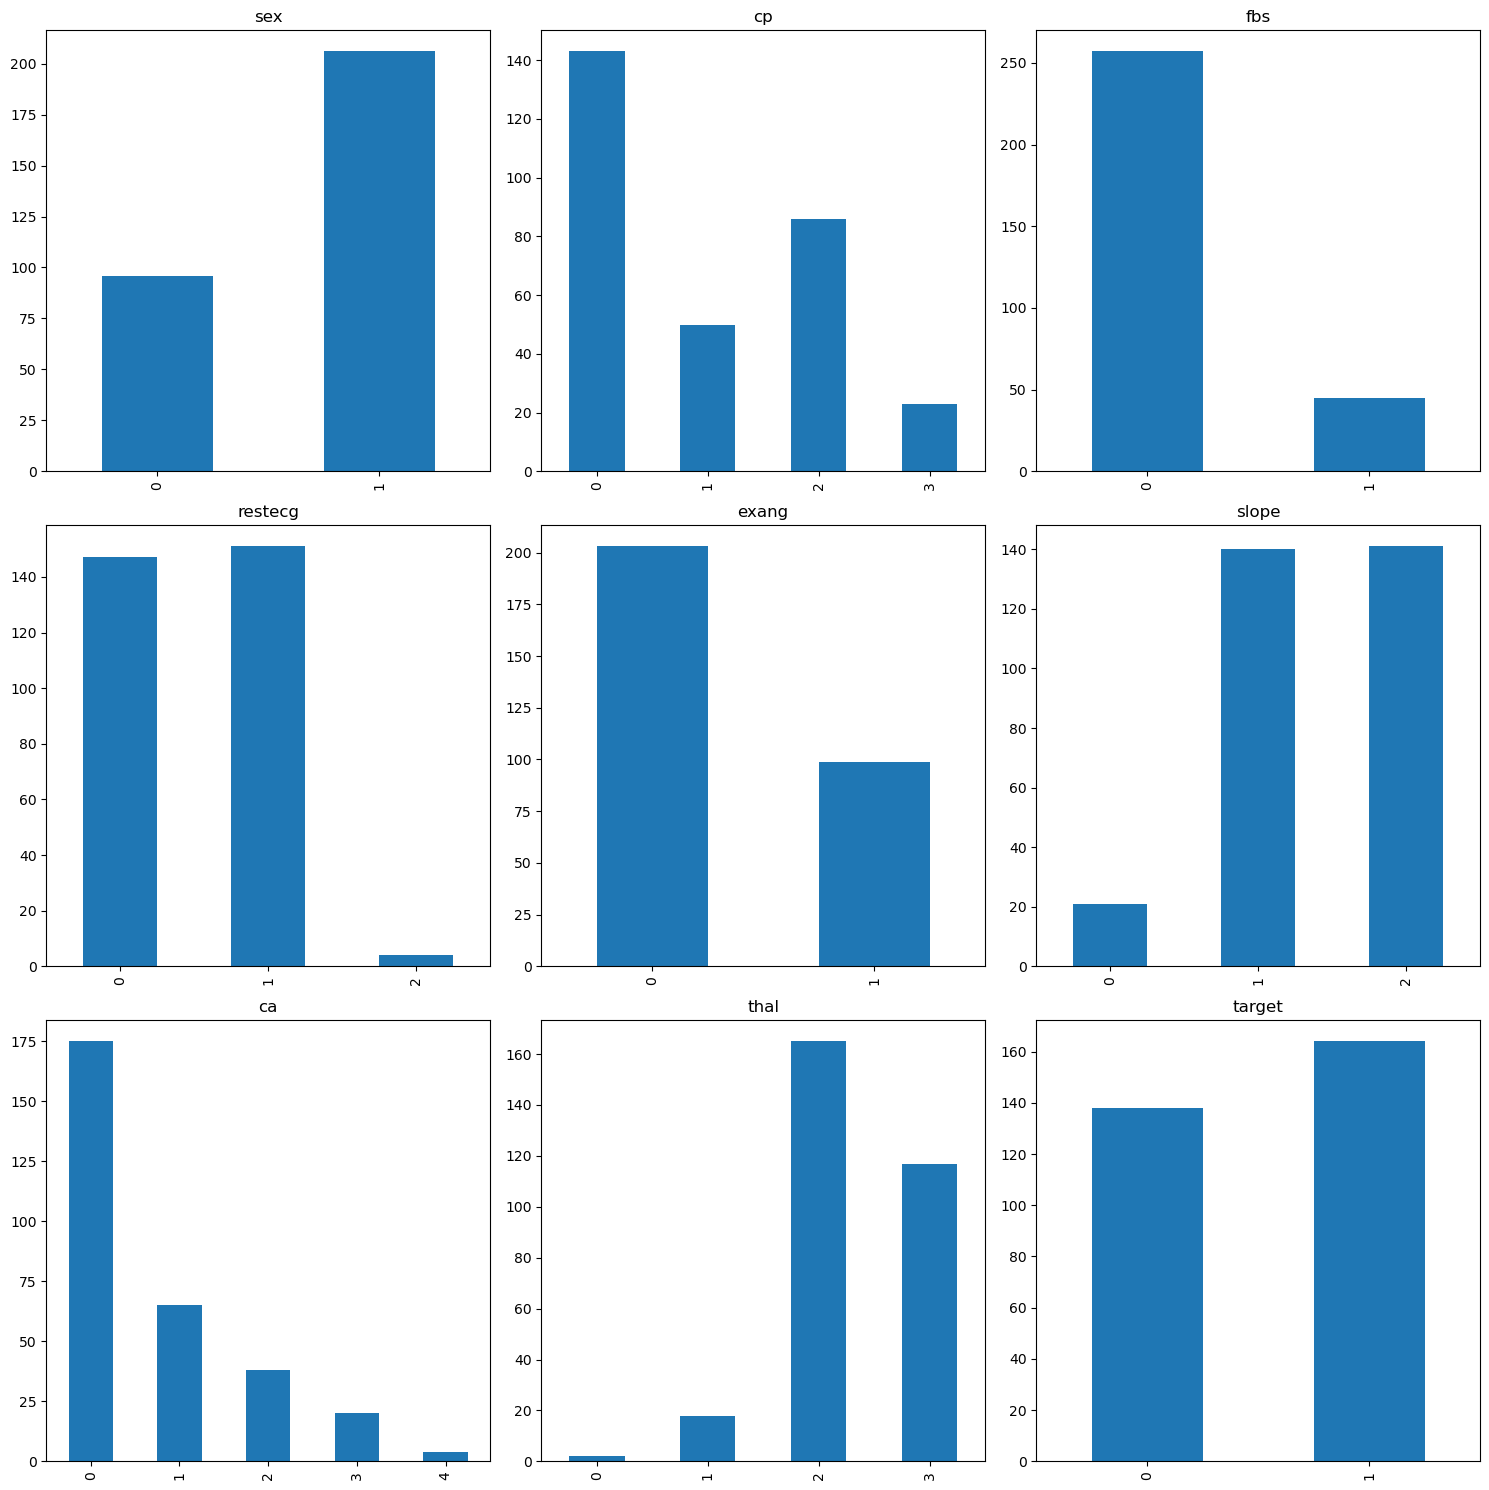

In [18]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for idx, col in enumerate(cats):
    row = idx // 3
    col_plot = idx % 3
    count = pd.crosstab(index=df[col], columns='count')
    count.plot(kind='bar', title=str(col), ax=axes[row, col_plot], legend=False,)
    axes[row, col_plot].set_xlabel('')
plt.tight_layout()

The distribution of the target variable is relatively balanced. This should not lead to distortions. 
Gender and Exercise-Induced Angina are both very unbalanced, which could later influence the model

### Bivariate analysis

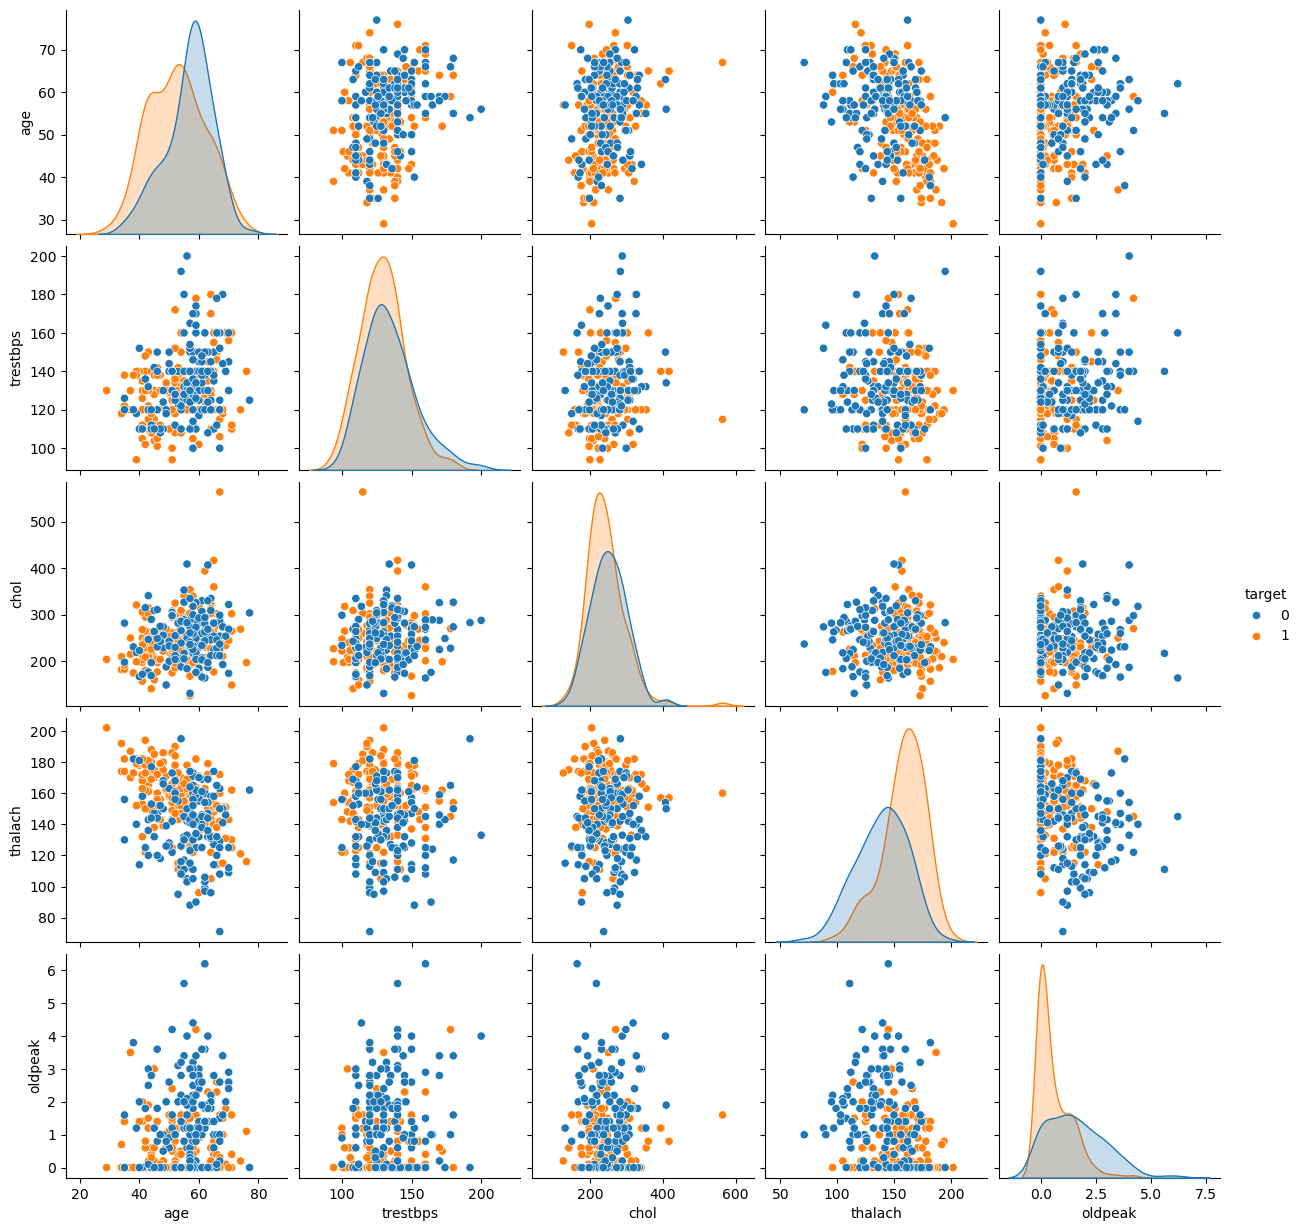

In [21]:
sns.pairplot(df, vars=nums, hue=cats[-1])

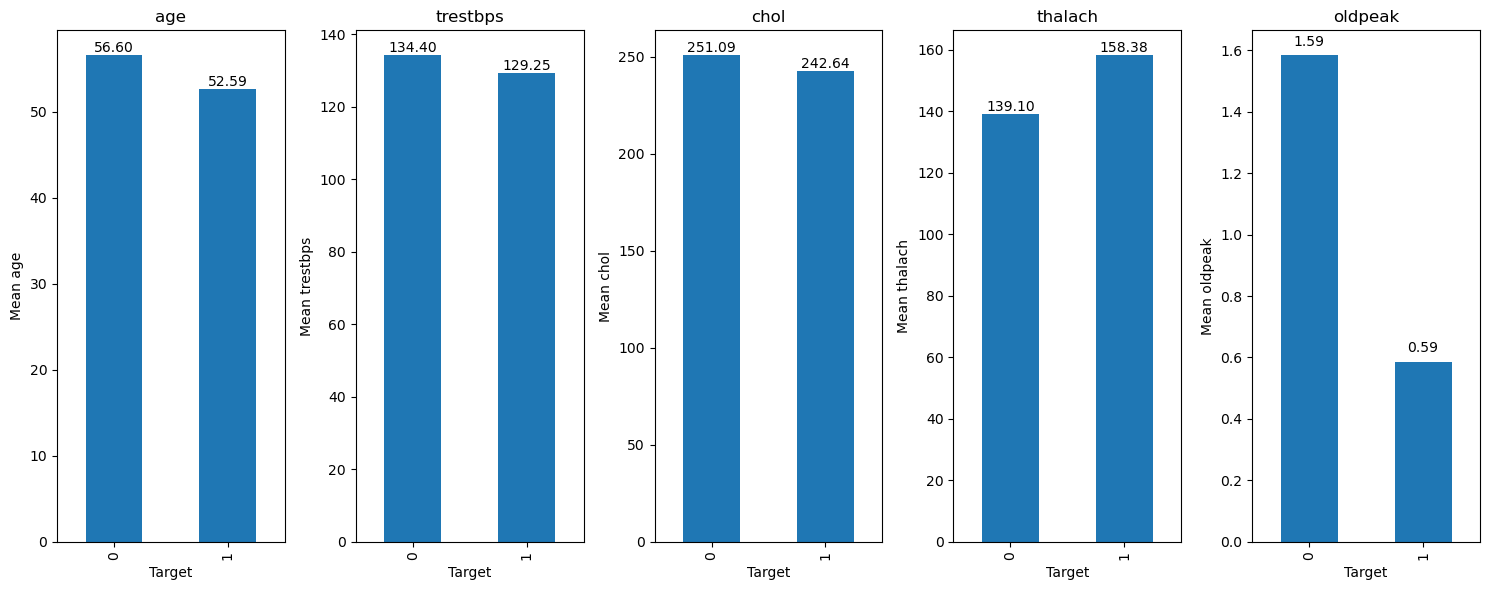

In [22]:
fig, axes = plt.subplots(ncols=5, figsize=(15,6))
for idx, col in enumerate(nums):
    grouped_by_target = df.groupby(cats[-1])[col].mean()
    bars = grouped_by_target.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Target')
    axes[idx].set_ylabel(f'Mean {col}')

    for bar in bars.patches:
        height = bar.get_height()
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,  
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )
plt.tight_layout()

Using numeric values like 0, 1, 2, etc., to represent different categories in data can mistakenly suggest linear relationships that aren't actually there. To avoid this, it's important to first replace these numeric codes with their specific categorical meanings, and then apply one-hot encoding to transform the data.

In [24]:
df.replace({'cp':{0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},
            'restecg':{0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'},
            'slope':{0:'upsloping',1:'flat',2:'downsloping'},
            'thal':{0:'unknown',1:'fixed defect',2:'normal',3:'reversable defect'},
             },inplace=True)
df_onehot = pd.get_dummies(data=df, 
                           columns=['cp', 'restecg', 'slope', 'thal'], 
                           dtype='int64')

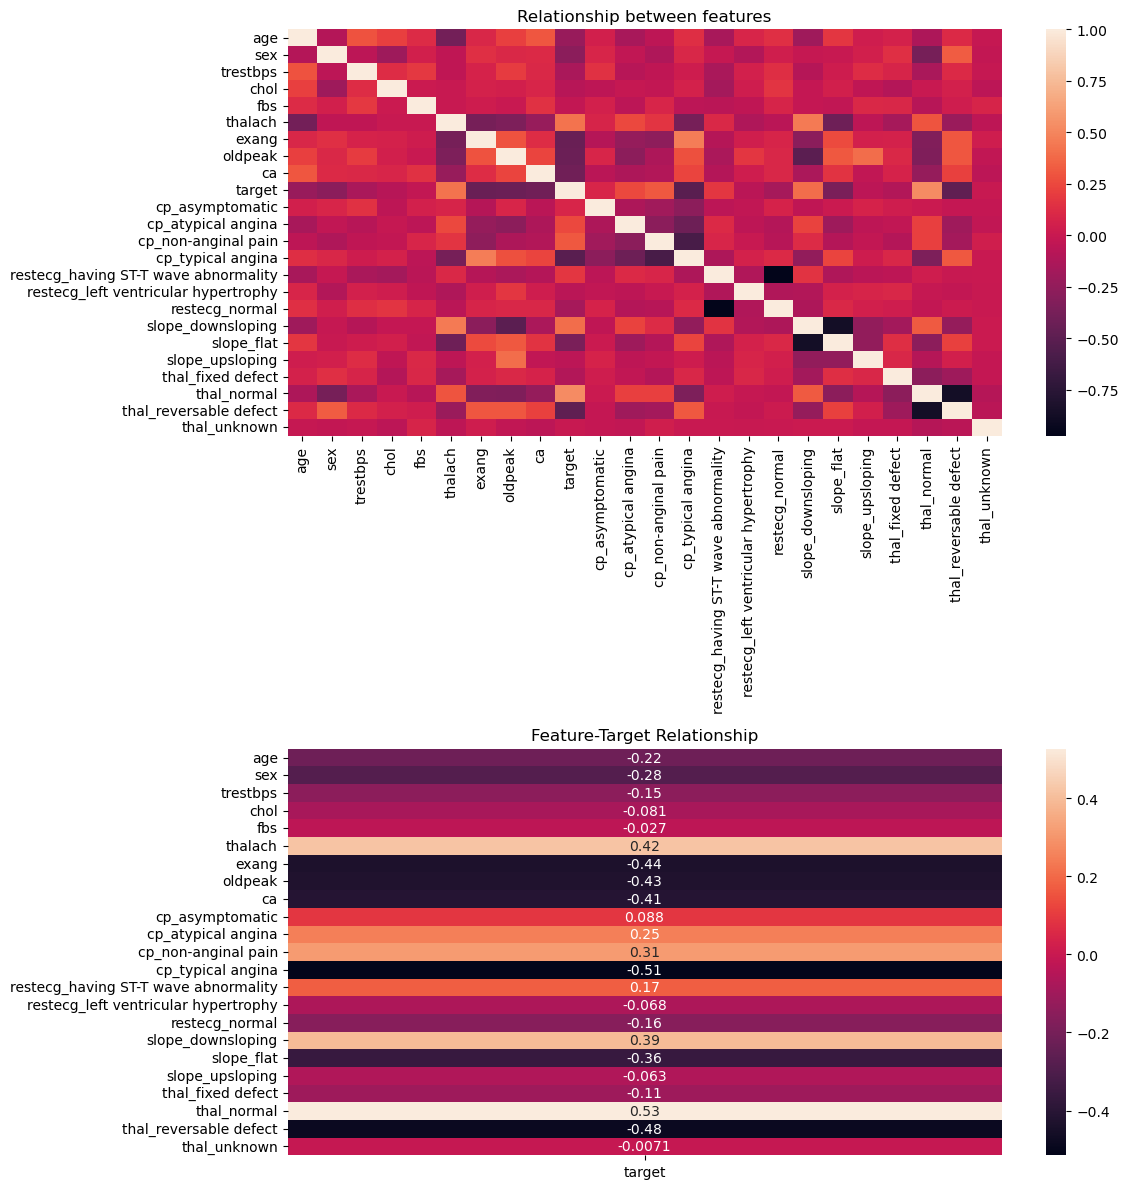

In [25]:
#Correlation
fig, ax=plt.subplots(nrows=2, figsize=(12,12))
sns.heatmap(df_onehot.corr(), ax=ax[0])
ax[0].set_title('Relationship between features')
sns.heatmap(df_onehot.corr()['target'].drop('target',axis=0).to_frame(),ax=ax[1], annot=True)
ax[1].set_title('Feature-Target Relationship')
plt.tight_layout()

## Modeling

### Preparation

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [29]:
#Split dataset into 'features' and 'target'

features = df_onehot.drop('target', axis=1)
target = df_onehot['target']

#Train_test_split

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=42)


### Dimensionality reduction

By using the One Hot Encoder there are now a lot of features. A dimension reduction could therefore make sense. That's why we compare PCA and FA. 

In [32]:
from sklearn.decomposition import PCA, FactorAnalysis

Text(0.5, 1.0, 'PCA Explained Variance vs. Number of Components')

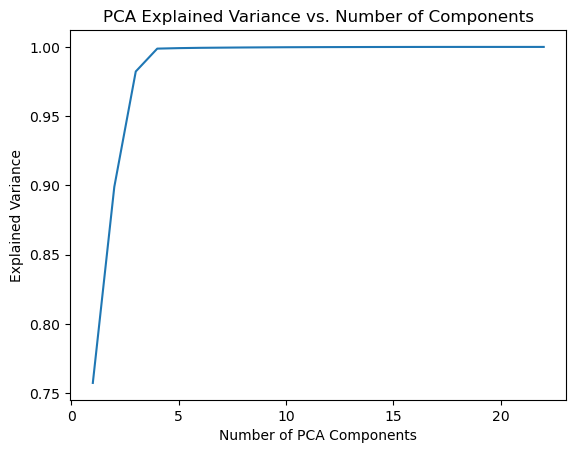

In [33]:
# PCA 
explained_variance = []
components = range(1, 23)  

for n in components:
    pca = PCA(n_components=n)
    pca.fit(features_train)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.plot(components, explained_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')

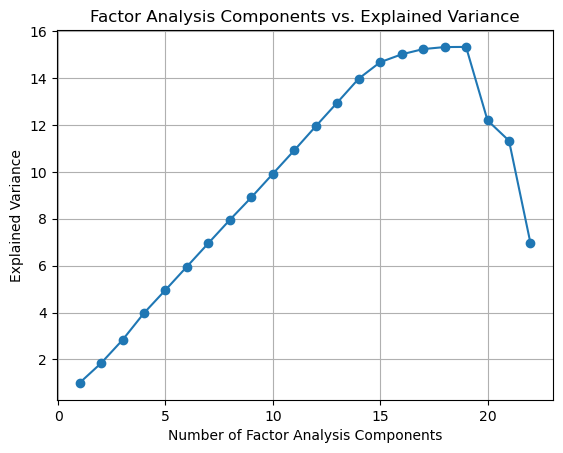

In [34]:
# FA
explained_variance = []
components = range(1, 23)  

for n in components:
    fa = FactorAnalysis(n_components=n, random_state=42)
    features_fa = fa.fit_transform(features_train)
    explained_variance.append(np.var(features_fa, axis=0).sum())

plt.plot(components, explained_variance, marker='o')
plt.xlabel('Number of Factor Analysis Components')
plt.ylabel('Explained Variance')
plt.title('Factor Analysis Components vs. Explained Variance')
plt.grid(True)

I decided to proceed with Factor Analysis (FA) as it effectively captures the underlying structure of the dataset. The FA results indicate that a significant amount of variance can be explained with a reasonable number of factors, which suggests that the data has a complex, multi-dimensional structure that can benefit from dimensionality reduction. By reducing the number of dimensions while retaining the most informative features, FA allows me to streamline the model, improve computational efficiency, and potentially enhance model performance. This approach also helps to mitigate the risk of overfitting by focusing on the most impactful features, thereby making the predictive model more robust and interpretable.

### Testing different models

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [38]:
def get_score(X_train, X_test, y_train, y_test, model):
    """
    Trains the given model using the provided training data, 
    evaluates it on the test data, and prints the evaluation metrics.

    Parameters:
    X_train: Features for training
    X_test: Features for testing
    y_train: Target values for training
    y_test: Target values for testing
    model: The model to be trained and evaluated

    Returns:
    None
    """
    # train model
    model.fit(X_train, y_train)

    # predicting test_data
    y_pred = model.predict(X_test)
    
    # show results
    print(f"Model: {model.named_steps['classifier'].__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("\n" + "-"*50 + "\n")

In [39]:
models = [RandomForestClassifier(),
          LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          SVC()]

for model in models:
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('factor_analysis', FactorAnalysis(n_components=19, random_state=42)),
                               ('classifier', model)])
    get_score(features_train, features_test, target_train, target_test, pipeline)

Model: RandomForestClassifier
Accuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1 Score: 0.8750
Confusion Matrix:
[[25  4]
 [ 4 28]]

--------------------------------------------------

Model: LogisticRegression
Accuracy: 0.9016
Precision: 0.9333
Recall: 0.8750
F1 Score: 0.9032
Confusion Matrix:
[[27  2]
 [ 4 28]]

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1 Score: 0.8333
Confusion Matrix:
[[26  3]
 [ 7 25]]

--------------------------------------------------

Model: DecisionTreeClassifier
Accuracy: 0.7049
Precision: 0.7500
Recall: 0.6562
F1 Score: 0.7000
Confusion Matrix:
[[22  7]
 [11 21]]

--------------------------------------------------

Model: SVC
Accuracy: 0.8197
Precision: 0.8621
Recall: 0.7812
F1 Score: 0.8197
Confusion Matrix:
[[25  4]
 [ 7 25]]

--------------------------------------------------



When it comes to medical questions, the most important thing is often to identify sick people, even if there are a few false positive predictions. That's why it makes sense to take a closer look at the underlying problem here. The Random Forest Classifier and Logistic Regression models have the highest recall, which is why it is worth building on these models and trying to improve them even further.

### Model interpretation

#### Feature Importance in RandomForestClassifier

The RandomForestClassifier gives us the opportunity to determine the importance of each feature. This is based on how much each variable contributes to reducing impurity (Gini Impurity) across all trees in the forest.

Text(0.5, 1.0, 'Feature Importance for RandomForestClassifier')

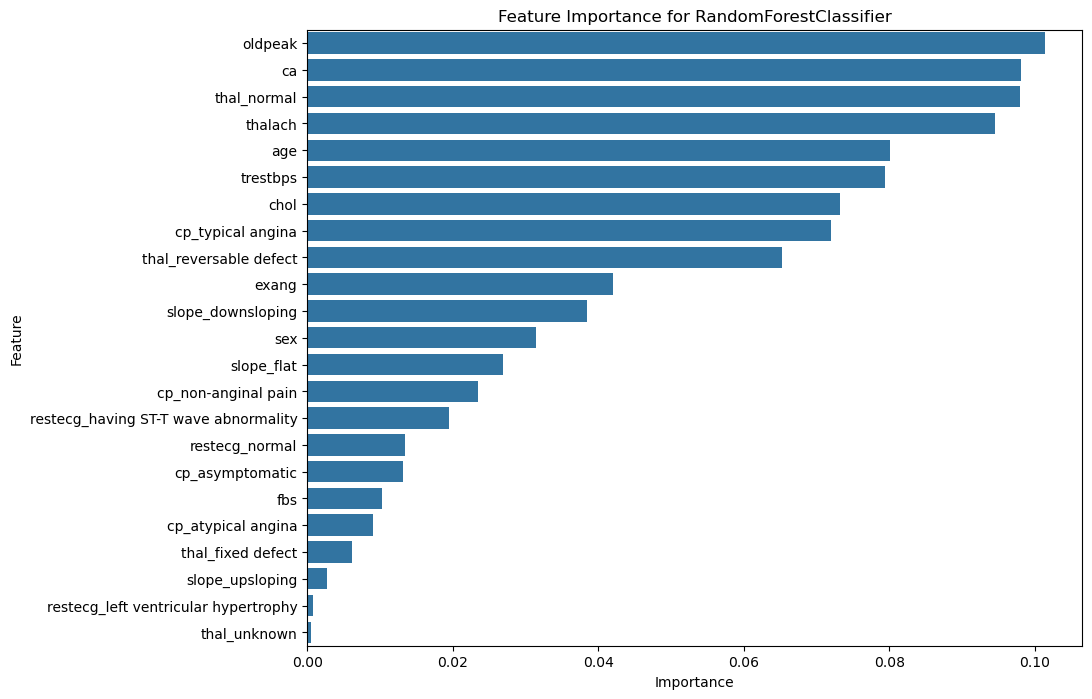

In [43]:
rf = RandomForestClassifier(random_state=42)
rf.fit(features_train, target_train)

importances = rf.feature_importances_

feature_names = features_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for RandomForestClassifier')

As there is no universal threshold value for feature importance, I test different values

In [45]:
thresholds = np.arange(0.01, 0.03, 0.005) 
best_recall = 0
best_threshold = 0

for threshold in thresholds:
    selected_features = features_train.columns[importances > threshold]
    features_train_selected = features_train[selected_features]
    features_test_selected = features_test[selected_features]
    
    rf.fit(features_train_selected, target_train)
    
    y_pred = rf.predict(features_test_selected)
    recall = recall_score(target_test, y_pred)
    
    if recall > best_recall:
        best_recall = recall
        best_threshold = threshold

print(f"\nBest Threshold: {best_threshold:.3f} with Recall: {best_recall:.4f}")
print(f"Selected Features:\n{importance_df[importance_df['Importance'] > best_threshold]['Feature']}")


Best Threshold: 0.010 with Recall: 0.8750
Selected Features:
7                                  oldpeak
8                                       ca
20                             thal_normal
5                                  thalach
0                                      age
2                                 trestbps
3                                     chol
12                       cp_typical angina
21                  thal_reversable defect
6                                    exang
16                       slope_downsloping
1                                      sex
17                              slope_flat
11                     cp_non-anginal pain
13    restecg_having ST-T wave abnormality
15                          restecg_normal
9                          cp_asymptomatic
4                                      fbs
Name: Feature, dtype: object


#### Coefficients in Logistic Regression

In LogisticRegression the coefficients are important because they indicate how strongly each input variable correlates with the target variable when all other variables are held constant.

                                 Feature  Coefficient
11                   cp_non-anginal pain     0.733627
20                           thal_normal     0.720833
16                     slope_downsloping     0.434875
13  restecg_having ST-T wave abnormality     0.297104
4                                    fbs     0.213950
9                        cp_asymptomatic     0.163789
19                     thal_fixed defect     0.084845
22                          thal_unknown     0.036042
5                                thalach     0.023079
0                                    age     0.022447
3                                   chol    -0.001930
10                    cp_atypical angina    -0.003093
14  restecg_left ventricular hypertrophy    -0.003863
2                               trestbps    -0.018221
18                       slope_upsloping    -0.028796
15                        restecg_normal    -0.280706
7                                oldpeak    -0.387546
17                          

Text(0.5, 1.0, 'Coefficients for LogisticRegression')

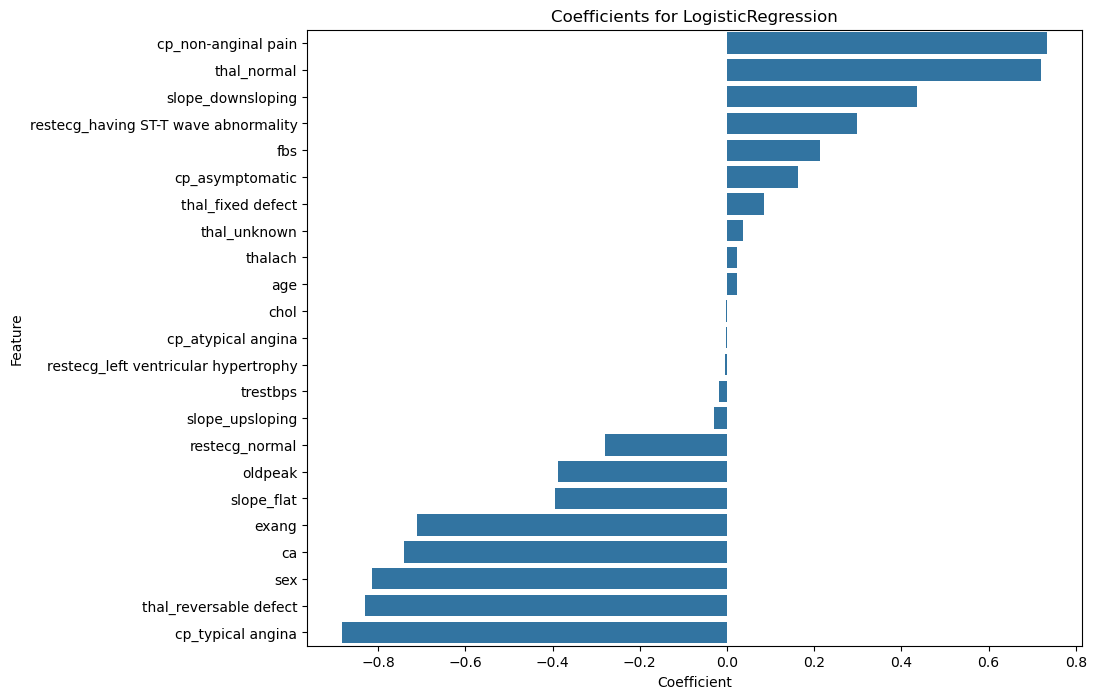

In [48]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(features_train, target_train)

coefficients = lr_model.coef_[0]

feature_names = features_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coefficients for LogisticRegression')

As with the random forest, I also test different threshold values here

In [50]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    print(f"\nTesting threshold: ±{threshold}")

    selected_features = coef_df[
        (coef_df['Coefficient'] >= threshold) | 
        (coef_df['Coefficient'] <= -threshold)
    ]['Feature']

    features_train_selected = features_train[selected_features]
    features_test_selected = features_test[selected_features]

    lr_model.fit(features_train_selected, target_train)

    y_pred = lr_model.predict(features_test_selected)
    accuracy = accuracy_score(target_test, y_pred)
    precision = precision_score(target_test, y_pred)
    recall = recall_score(target_test, y_pred)
    f1 = f1_score(target_test, y_pred)

    print(f"Number of selected features: {len(selected_features)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Testing threshold: ±0.2
Number of selected features: 13
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1 Score: 0.8571

Testing threshold: ±0.3
Number of selected features: 10
Accuracy: 0.8361
Precision: 0.8667
Recall: 0.8125
F1 Score: 0.8387

Testing threshold: ±0.4
Number of selected features: 8
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1 Score: 0.8333

Testing threshold: ±0.5
Number of selected features: 7
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1 Score: 0.8333

Testing threshold: ±0.6
Number of selected features: 7
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1 Score: 0.8333

Testing threshold: ±0.7
Number of selected features: 7
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1 Score: 0.8333


### Hyperparameter tuning with GridSearch

As the further reduction of features did not lead to an improvement in recall for any of the models, I am trying a hyperparameter tuning with GridSearch

#### Random Forest Classifier

In [52]:
from sklearn.model_selection import GridSearchCV

rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('factor_analysis', FactorAnalysis(n_components=19, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_pipeline, 
                              rf_param_grid, 
                              scoring='recall', 
                              cv=5, 
                              n_jobs=-1)

rf_grid_search.fit(features_train, target_train)

print(f"Best parameters for RandomForest: {rf_grid_search.best_params_}")
print(f"Best recall score for RandomForest: {rf_grid_search.best_score_:.4f}")

best_rf_model = rf_grid_search.best_estimator_
get_score(features_train, features_test, target_train, target_test, best_rf_model)

Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best recall score for RandomForest: 0.8336
Model: RandomForestClassifier
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1 Score: 0.8710
Confusion Matrix:
[[26  3]
 [ 5 27]]

--------------------------------------------------



#### Logistic Regression

In [54]:
lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('factor_analysis', FactorAnalysis(n_components=19, random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

lr_grid_search = GridSearchCV(lr_pipeline, 
                              lr_param_grid, 
                              scoring='recall', 
                              cv=5, 
                              n_jobs=-1)
lr_grid_search.fit(features_train, target_train)

print(f"Best parameters for LogisticRegression: {lr_grid_search.best_params_}")
print(f"Best recall score for LogisticRegression: {lr_grid_search.best_score_:.4f}")

best_lr_model = lr_grid_search.best_estimator_
get_score(features_train, features_test, target_train, target_test, best_lr_model)

Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best recall score for LogisticRegression: 0.8561
Model: LogisticRegression
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1 Score: 0.8710
Confusion Matrix:
[[26  3]
 [ 5 27]]

--------------------------------------------------



### Ensemble-Modell with Voting Classifier

The results of the GridSearch show that although we identified the best parameters for both models, the recall was not significantly improved. I therefore try to combine the predictions of the two models in order to benefit from the strengths of both.

In [56]:
from sklearn.ensemble import VotingClassifier

logistic_regression = LogisticRegression(C=0.01, 
                                         penalty='l2', 
                                         random_state=42)
random_forest = RandomForestClassifier(n_estimators=50, 
                                       max_depth=None, 
                                       min_samples_leaf=4,
                                       min_samples_split=2, 
                                       random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', logistic_regression), 
                                          ('rf', random_forest)],
                              voting='soft')

ensemble_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                    ('factor_analysis', FactorAnalysis(n_components=19, random_state=42)), 
                                    ('classifier', voting_clf)])

get_score(features_train, features_test, target_train, target_test, ensemble_pipeline)

Model: VotingClassifier
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1 Score: 0.8571
Confusion Matrix:
[[25  4]
 [ 5 27]]

--------------------------------------------------



The VotingClassifier delivered similar results to the best individual models, particularly in terms of recall and F1 score.

## Summary

The aim of the project was the prediction of heart disease based on the given patient data. The Exploratory Data Analysis (EDA) revealed important insights into the distribution and correlations of the data. Categorical variables were converted into numerical values by one-hot encoding. Numerical features were normalised using the standard scaler. The dimensions of the features were reduced by applying factor analysis. Initially, the following models were tested: Random Forest Classifier, Logistic Regression, K-Nearest Neighbours, Decision Tree Classifier and Support Vector Classifier (SVC). The models were evaluated on the basis of accuracy, precision, recall and F1 score. Random Forest Classifier and Logistic Regression achieved the best results in terms of recall. Grid Search was used to find the best hyperparameters for Logistic Regression and Random Forest Classifier.

Best parameters:

Logistic Regression: C=0.01, penalty=‘l2’  
Random Forest: max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50

Features were selected based on importance (random forest) and coefficients (logistic regression). Thresholds were tested to optimise feature selection but did not significantly improve recall and a voting classifier was created combining the best models to improve prediction performance.

Results:
Accuracy: 0.8525  
Precision: 0.8710  
Recall: 0.8438  
F1 Score: 0.8571  

The best single model based on recall was the Random Forest Classifier. The voting classifier offers a robust combination of the best models, but without a significant improvement in recall compared to the best single model. The Random Forest Classifier should be used as the main model for the prediction of heart disease, especially due to its high recall rate. Further refinement of the models, additional feature engineering or the collection of additional data could further improve the model. 